In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/remote-work-health-impact-survey-2025/post_pandemic_remote_work_health_impact_2025.csv


## Importing libraries and EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/remote-work-health-impact-survey-2025/post_pandemic_remote_work_health_impact_2025.csv')
df.head()


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [4]:
df.isnull().sum()

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

In [5]:
df['Mental_Health_Status'].fillna('Good', inplace=True)

/tmp/ipykernel_13/2306716903.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mental_Health_Status'].fillna('Good', inplace=True)


In [6]:
df['Physical_Health_Issues'].fillna('No Issue', inplace=True)

/tmp/ipykernel_13/3175126825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Physical_Health_Issues'].fillna('No Issue', inplace=True)


In [7]:
df.isnull().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

## Burnout VS Job levels in each work arrangement


In [8]:
salary_map = {
    "$40K-60K": "Entry Level",
    "$60K-80K": "Mid Level",
    "$80K-100K": "Upper Mid Level",
    "$100K-120K": "Senior Level",
    "$120K+": "Executive / Leadership"
}

df["Salary_Category"] = df["Salary_Range"].map(salary_map)
salary_order = [
    "Entry Level",
    "Mid Level",
    "Upper Mid Level",
    "Senior Level",
    "Executive / Leadership"
]

In [9]:
burnout_prop = (
    df[df["Burnout_Level"] == "High"]
    .groupby(["Salary_Category", "Work_Arrangement"])
    .size() / df.groupby(["Salary_Category", "Work_Arrangement"]).size()
).unstack()


<Axes: title={'center': 'Burnout Proportion by Salary Level and Work Arrangement'}, xlabel='Salary_Category'>

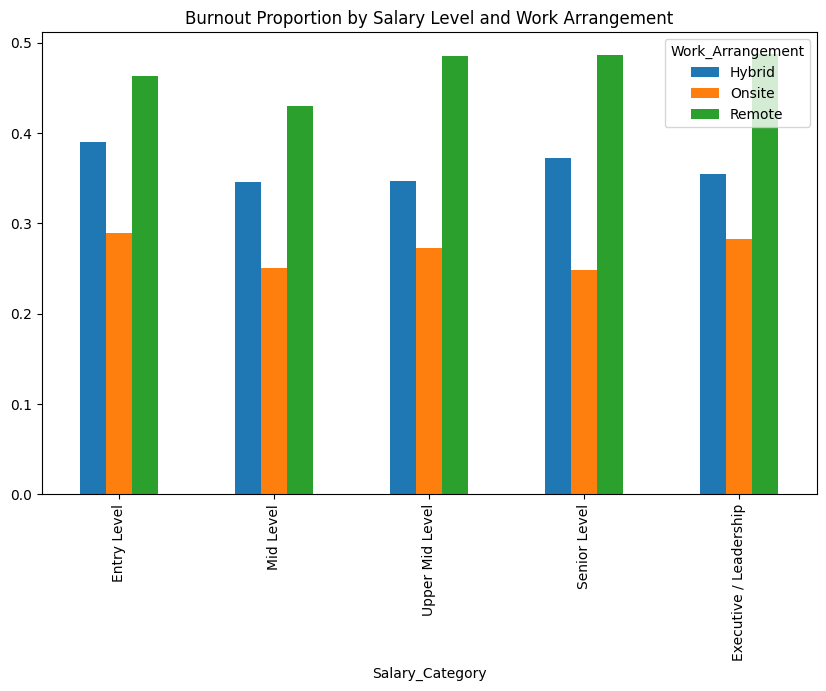

In [10]:
burnout_prop.loc[salary_order].plot(kind="bar", figsize=(10,6), title="Burnout Proportion by Salary Level and Work Arrangement")


Across all salary levels, the green bars (Remote) are the tallest — meaning:

People working remotely show the highest proportion of high burnout at every job level.

The onsite (orange) bars are always the shortest, showing the lowest burnout.

Hybrid sits in between.

## Does more time at work mean high burnout regardless of work arrangement?

In [11]:
bins = [0, 30, 40, 45, 50, 60, 100]
labels = ["<30", "30–40", "40–45", "45–50", "50–60", "60+"]
df["Hour_Bin"] = pd.cut(df["Hours_Per_Week"], bins=bins, labels=labels)
burnout_ratio_by_hours_arrangement = (
    df[df["Burnout_Level"] == "High"]
    .groupby(["Hour_Bin", "Work_Arrangement"])
    .size() / df.groupby(["Hour_Bin", "Work_Arrangement"]).size()
).unstack()  

/tmp/ipykernel_13/901130634.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Hour_Bin", "Work_Arrangement"])
/tmp/ipykernel_13/901130634.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .size() / df.groupby(["Hour_Bin", "Work_Arrangement"]).size()


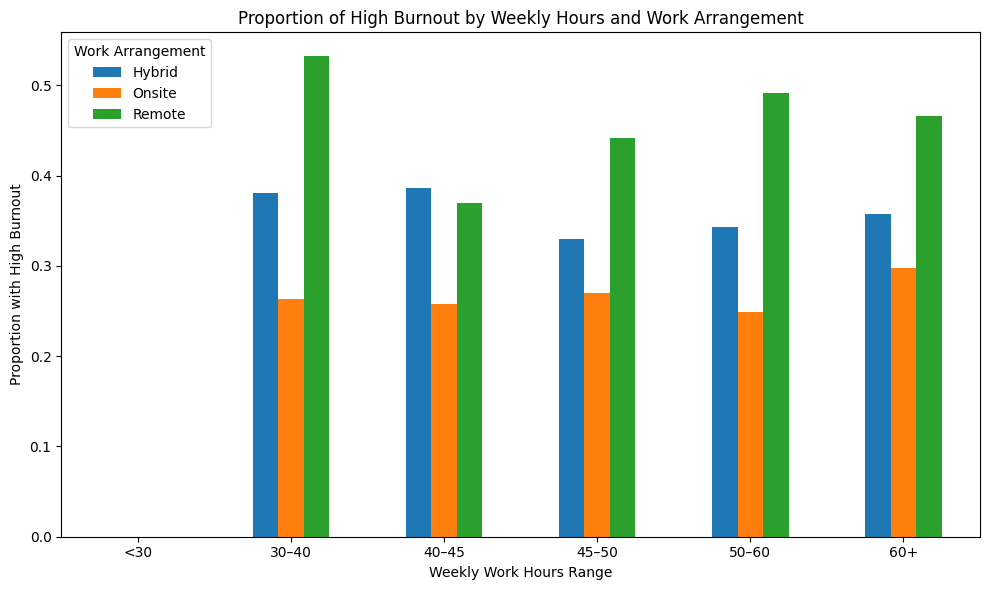

In [12]:
burnout_ratio_by_hours_arrangement.plot(kind="bar", figsize=(10,6))
plt.title("Proportion of High Burnout by Weekly Hours and Work Arrangement")
plt.ylabel("Proportion with High Burnout")
plt.xlabel("Weekly Work Hours Range")
plt.xticks(rotation=0)
plt.legend(title="Work Arrangement")
plt.tight_layout()
plt.show()


Almost in all work arrangement types, burnout level is high in remote jobs, except for people working 40-45 hours who shows slightly higher proportion of burnout in hybrid working style. 

## Which industries are more prone to burnout?

In [13]:
burnout_by_industry = (
    df[df["Burnout_Level"] == "High"]
    .groupby("Industry")
    .size() / df.groupby("Industry").size()
).sort_values(ascending=False)

print(burnout_by_industry)

Industry
Technology               0.389545
Marketing                0.356436
Healthcare               0.344130
Finance                  0.335150
Manufacturing            0.318919
Customer Service         0.317919
Professional Services    0.312329
Retail                   0.303191
Education                0.268293
dtype: float64


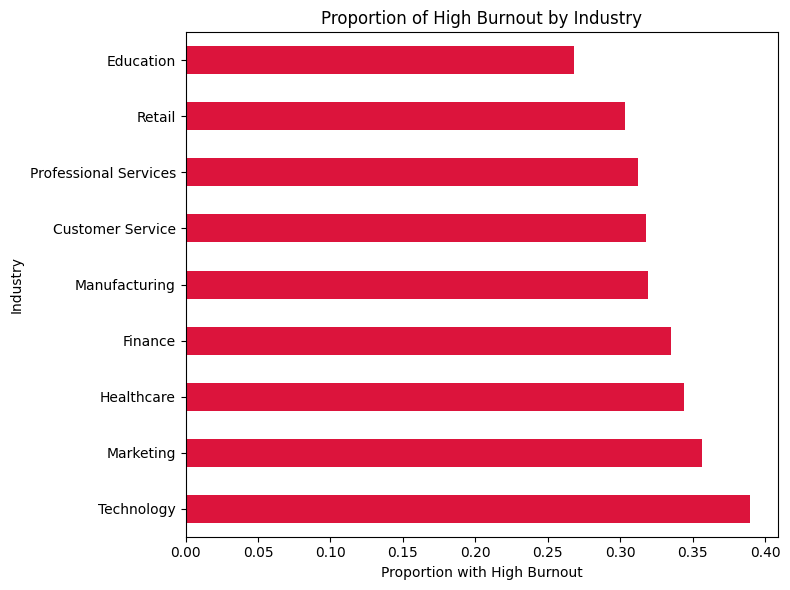

In [14]:
burnout_by_industry.plot(kind="barh", color="crimson", figsize=(8,6))
plt.title("Proportion of High Burnout by Industry")
plt.xlabel("Proportion with High Burnout")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

The highest burnout proportion is found in the industry of "Technology" which suggests that tech roles might be more stressful or demanding, leading to higher burnout rates. Other industries with notable burnout levels include "Education" and "Retail", indicating that these fields also face significant stressors.

## Who's most isolated?

/tmp/ipykernel_13/2937044976.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  isolation_by_age_arrangement = df.groupby(["Age_Group", "Work_Arrangement"])["Social_Isolation_Score"].mean().unstack()


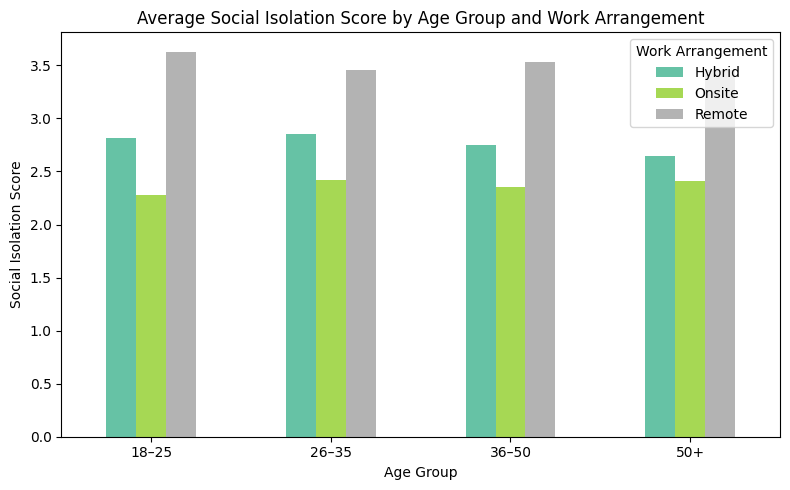

In [15]:
bins = [18, 25, 35, 50, 100]
labels = ["18–25", "26–35", "36–50", "50+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

isolation_by_age_arrangement = df.groupby(["Age_Group", "Work_Arrangement"])["Social_Isolation_Score"].mean().unstack()
isolation_by_age_arrangement.plot(kind="bar", figsize=(8, 5), colormap="Set2")
plt.title("Average Social Isolation Score by Age Group and Work Arrangement")
plt.ylabel("Social Isolation Score")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(title="Work Arrangement")
plt.tight_layout()
plt.show()


In all age groups, people reported higher social isolation score when working remote.

## Physical issues based on work arrangement

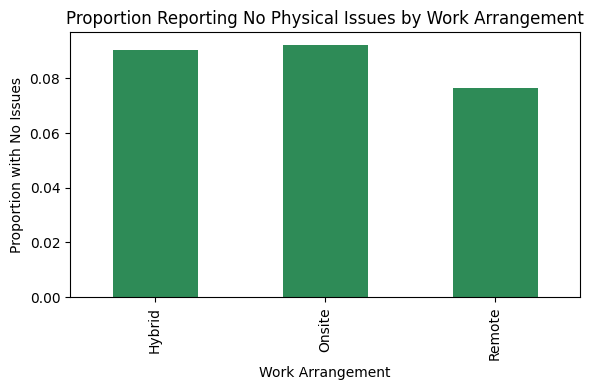

In [16]:
df["Clean_Physical_Issues"] = df["Physical_Health_Issues"].str.strip()


no_issue_ratio = (
    df[df["Clean_Physical_Issues"] == "No Issue"]
    .groupby("Work_Arrangement")
    .size() / df.groupby("Work_Arrangement").size()
)

no_issue_ratio.plot(kind="bar", color="seagreen", figsize=(6,4))
plt.title("Proportion Reporting No Physical Issues by Work Arrangement")
plt.ylabel("Proportion with No Issues")
plt.xlabel("Work Arrangement")
plt.tight_layout()
plt.show()



In remote jobs, fewer people reported they have no physical issues while in onsite jobs, the proportion of having no issues is higher. 